# Lead Scoring Case Study

## Submitted by
- Parijaat Sunil
- Pratikshit Gaur
- Shreya Pattan

## 1. Initializing Python

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries

# importing numpy and pandas
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

# importing data visualization libraries
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

# importing logistic regression libraries and methods
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


## 2. Importing and analyzing the dataframe

In [3]:
# Importing the Leads data file into a pandas dataframe
lead_df = pd.read_csv('Leads.csv')

In [4]:
# Checking the top 5 rows of the dataframe
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking the shape of the dataframe
lead_df.shape

(9240, 37)

In [6]:
# Checking the info of the dataframe
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 3. Cleaning the dataframe

### a. Dropping unique identifiers

In [7]:
# Checking if prospect ID is a unique identifier
lead_df['Prospect ID'].value_counts().count()

9240

In [8]:
# Checking if Lead Number is a unique identifier
lead_df['Lead Number'].value_counts().count()

9240

Since both Prospect ID and Lead Number columns contain unique identifiers, they are not going to help in our model 

In [9]:
# Dropping the columns which will not affect the model
dropcols = ['Prospect ID','Lead Number']
lead_df.drop(dropcols, axis=1,inplace=True)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### b. Dropping columns with only one value

In [10]:
# Finding the number of unique values in each column
lead_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

We can drop columns with only one unique value as they will not help with building our model

In [11]:
# Dropping columns with only one unique value
dropcols=['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
          'Get updates on DM Content','I agree to pay the amount through cheque']
lead_df.drop(dropcols,axis=1,inplace=True)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


### c. Dropping columns with a high number of missing values

There are values which are marked as 'Select' in all the columns. This value is input when the user does not confirm any selection, and can be treated as a missing value

In [12]:
lead_df.replace('Select',np.nan, inplace=True)

In [13]:
# Finding the percentage of missing values in each column
round((lead_df.isnull().sum()/len(lead_df))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

We can drop columns with more than 40% missing data

In [14]:
# Dropping columns with more than 40% missing data
dropcols=['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index',
          'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
lead_df.drop(dropcols,axis=1,inplace=True)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [15]:
# Checking the percentage of missing values in missing columns again
round((lead_df.isnull().sum()/len(lead_df))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

We need to analyze the remaining columns with high number of missing values

#### i. Country Column

<Axes: xlabel='Country'>

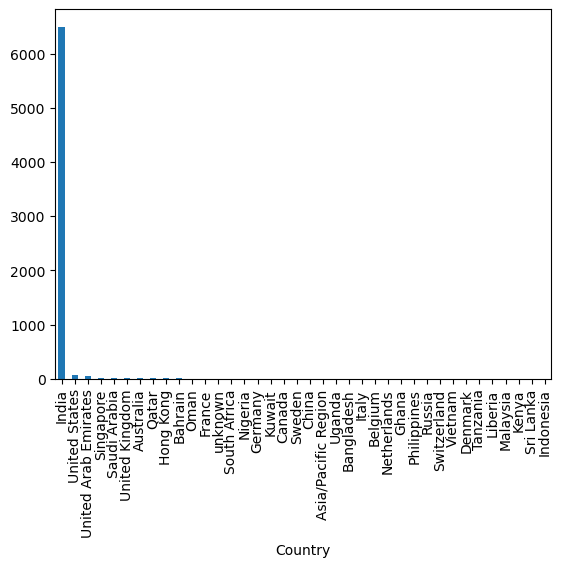

In [16]:
# Analyzing the spread of values in the country column
lead_df.Country.value_counts().plot.bar()

In [17]:
# Finding the number of rows where country is not India
lead_df.Country[lead_df.Country!='India'].count()

287

We can drop this column, as the data is extremely skewed.

In [18]:
lead_df.drop('Country', axis=1, inplace=True)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


#### ii. What is your current occupation

<Axes: xlabel='What is your current occupation'>

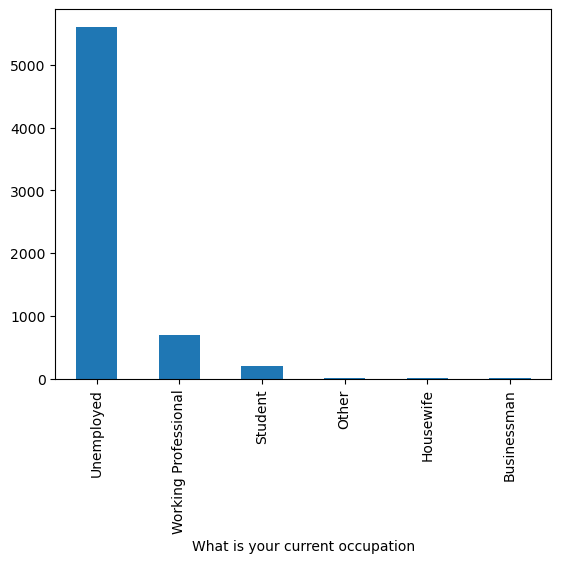

In [19]:
# Displaying the spread of current occupation
lead_df['What is your current occupation'].value_counts().plot.bar()

Most of the users seem to fall under the Unemployed category. We can fill in the missing values in this column with this value.

<Axes: xlabel='What is your current occupation'>

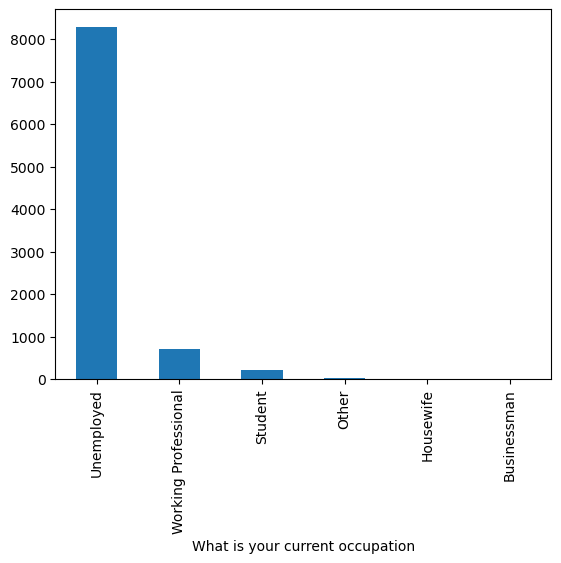

In [20]:
# replacing missing values with "Unemployed" value
lead_df['What is your current occupation'].fillna('Unemployed', inplace=True)

#Checking the spread again to ensure that missing values are filled with the Unemployed value
lead_df['What is your current occupation'].value_counts().plot.bar()

#### iii. Specialization

<Axes: xlabel='Specialization'>

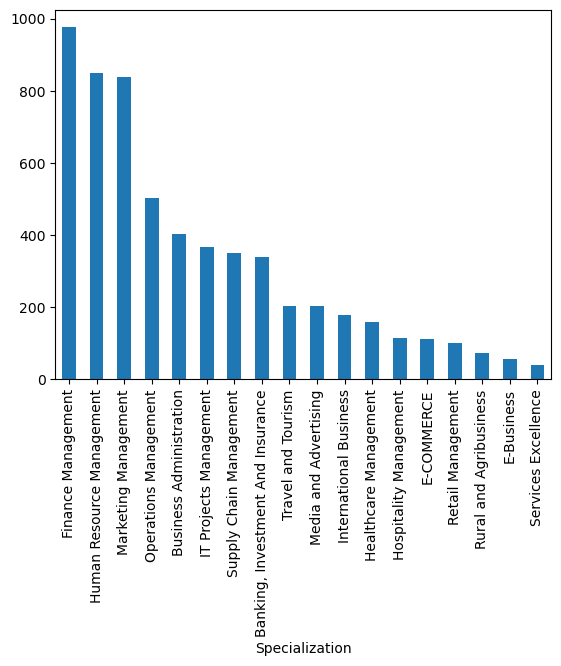

In [21]:
# Analyzing the spread of values in the Specialization column
lead_df.Specialization.value_counts().plot.bar()

The spread in specialization seems to be important. Since most of the users fall under the unemployed category, we can fill in the missing values in this column with a placeholder like "none"

<Axes: xlabel='Specialization'>

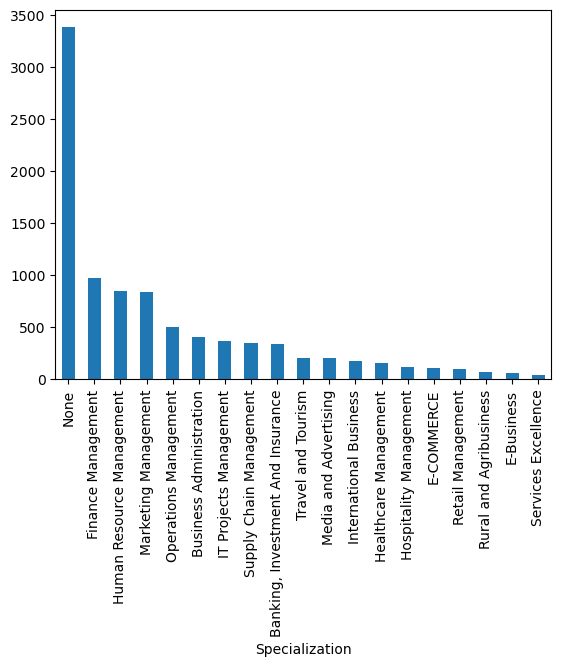

In [22]:
# replacing missing values with "None" value
lead_df.Specialization.fillna('None', inplace=True)

#Checking the spread again to ensure that missing values are filled with the None value
lead_df.Specialization.value_counts().plot.bar()

#### iv. What matters most to you in choosing a course

In [23]:
# Analyzing the spread of values in the What matters most to you in choosing a course column
lead_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

Since this column is extremely skewed, with only 3 entries other than Better Career Prospects, we can drop this column

In [24]:
# Dropping the What matters most to you in choosing a course column
lead_df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,None,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,None,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,None,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


#### v. Tags

<Axes: xlabel='Tags'>

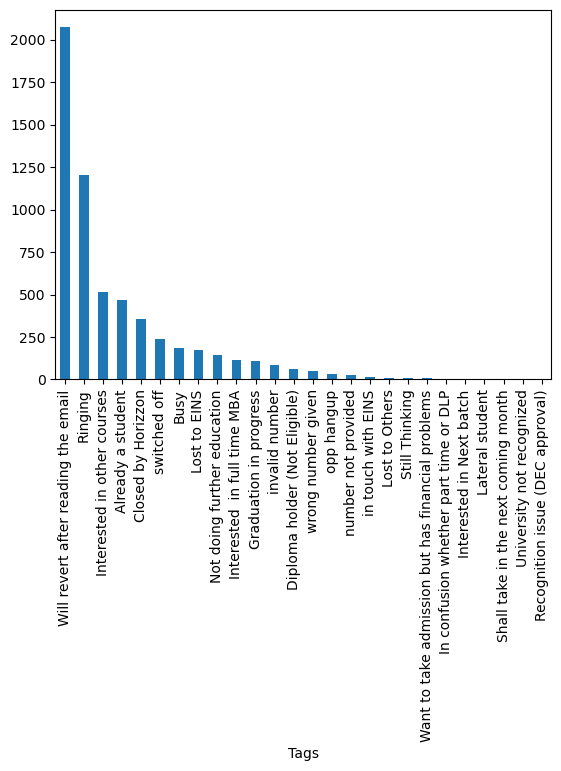

In [25]:
# Analyzing the spread of values in the Specialization column
lead_df.Tags.value_counts().plot.bar()

The Tags columns has many ambiguous and possibly duplicate categories. Considering the business understanding and having missing values close to 40%, we can drop this column

In [26]:
# Dropping the Tag column
lead_df.drop('Tags', axis=1, inplace=True)

lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,None,Unemployed,No,No,No,No,No,No,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,None,Unemployed,No,No,No,No,No,No,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,None,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified


#### vi. City

<Axes: xlabel='City'>

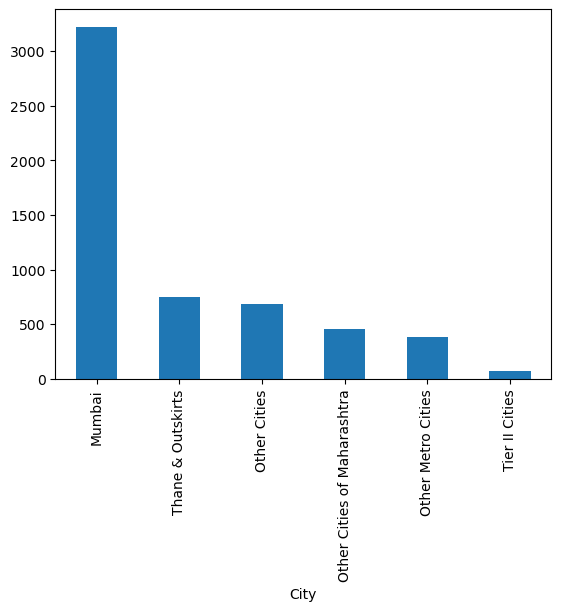

In [27]:
# Analyzing the spread of values in the Specialization column
lead_df.City.value_counts().plot.bar()

To ensure that imputing missing values does not create a bias in the result, we can replace missing values with 'Not Provided'

<Axes: xlabel='City'>

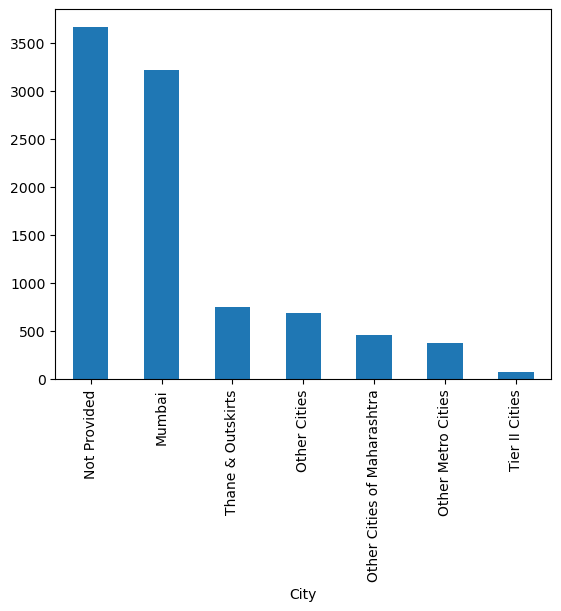

In [28]:
# Replacing missing values with 'Not Provided'
lead_df.City.fillna('Not Provided', inplace=True)

# Checking the spread of City column again
lead_df.City.value_counts().plot.bar()

Now that we have taken care of the columns with the highest number of missing values, lets check the missing value percentages again.

In [29]:
# Checking the percentage of missing values in missing columns again
round((lead_df.isnull().sum()/len(lead_df))*100,2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

For TotalVisits and Page Views Per Visit, we can impute missing values with 0

In [30]:
# Imputing missing values in TotalVisits and Page Views Per Visit columns with 0
lead_df.TotalVisits.fillna(0, inplace=True)
lead_df['Page Views Per Visit'].fillna(0, inplace=True)

# Checking missing values again
round((lead_df.isnull().sum()/len(lead_df))*100,2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

To understand the missing values for Last Activity, lets check the TotalVisits value

In [31]:
# Checking the spread of TotalVisits where Last Activity value is missing
lead_df[lead_df['Last Activity'].isnull()].TotalVisits.value_counts()

TotalVisits
0.0    103
Name: count, dtype: int64

As we see, there is no Last Activity recorded as these users did not visit the website at all. They may have opted for the course in person or on phone. Lets check the conversion ratio.

In [32]:
# Checking the converted values where Last Activity is missing
lead_df[lead_df['Last Activity'].isnull()].Converted.value_counts()

Converted
1    81
0    22
Name: count, dtype: int64

As we can see, this category has a very high conversion ratio. It would be better to keep these rows. We can replace missing values with 'None' for our model

In [33]:
# Replacing missing values with 'None'
lead_df['Last Activity'].fillna('None', inplace=True)

Finally, we can drop the rows with missing values from the Lead Source column as the number of rows is <1%

In [34]:
# Dropping rows with missing values in Lead Source column
lead_df.dropna(subset='Lead Source', axis=0, inplace=True)

# Checking missing values again
round((lead_df.isnull().sum()/len(lead_df))*100,2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [35]:
# Checking final Shape
lead_df.shape

(9204, 20)

We had to drop only 36 rows. As the data is clean, we can proceed with the EDA now

### d. Standardizing the data

In [36]:
# Defining a function to replace all Yes with 1 and No with 0
def map_yesno(x):
    return x.map({'Yes': 1, "No": 0})



In [37]:
# bringing all values in columns that need to be mapped to lower case
stdcols = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
         'Through Recommendations','A free copy of Mastering The Interview']
#lead_df[stdcols]=lead_df[stdcols].apply(lambda x: x.lower() if type(x) == str else x)

In [38]:
# Applying the function to columns which require binary standardization
lead_df[stdcols] = lead_df[stdcols].apply(map_yesno)

# Checking the new dataframe
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,None,Unemployed,0,0,0,0,0,0,Not Provided,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,None,Unemployed,0,0,0,0,0,0,Not Provided,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,None,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified


## 4. EDA

### a. Univariate Analysis

#### i. Converted

<Axes: xlabel='Converted'>

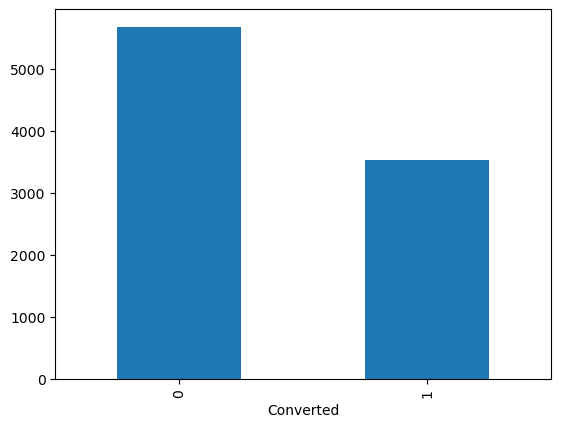

In [39]:
# Plotting the distribution of Converted column 
lead_df.Converted.value_counts().plot.bar()

In [40]:
# Finding the ratio of conversion
round(100*lead_df[lead_df.Converted==1].Converted.count()/len(lead_df),2)

38.37

Inferences:
- The current conversion ratio for leads is 38%
- The target conversion ratio is 80%

#### ii. Total Time Spent on Website

<Axes: >

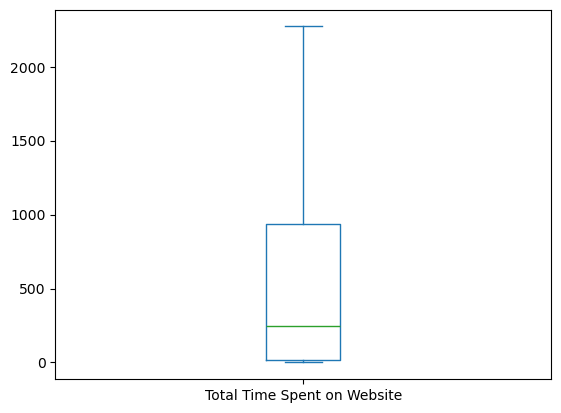

In [41]:
# Plotting a boxplot for the Total Time Spent on Website column
lead_df['Total Time Spent on Website'].plot.box()

In [42]:
# Describing the column values
lead_df['Total Time Spent on Website'].describe()

count    9204.000000
mean      489.005541
std       547.980340
min         0.000000
25%        14.000000
50%       250.000000
75%       938.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

Inferences:
- There are no outliers in the data
- The median time spent on the company website is 250 seconds

#### iii. Page Views Per Visit

<Axes: >

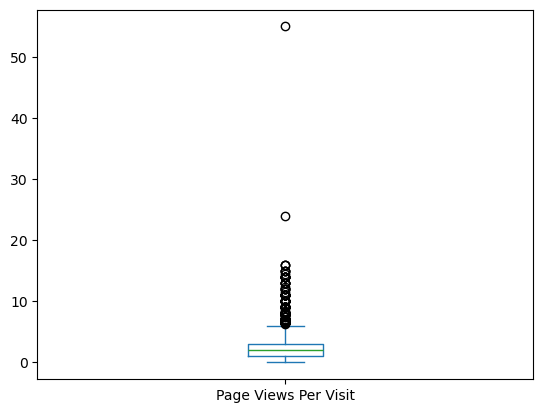

In [43]:
# Plotting a boxplot for the Page Views Per Visit column
lead_df['Page Views Per Visit'].plot.box()

In [44]:
# Describing the column values
lead_df['Page Views Per Visit'].describe()

count    9204.000000
mean        2.336674
std         2.163709
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

Inferences:
- There are many outliers in the data
- The median page views per visit on the company website is 2 pages

We saw the univariate analysis for most of the categorical variables 

### b. Bivariate Analysis

#### i. Categorical variables vs Converted

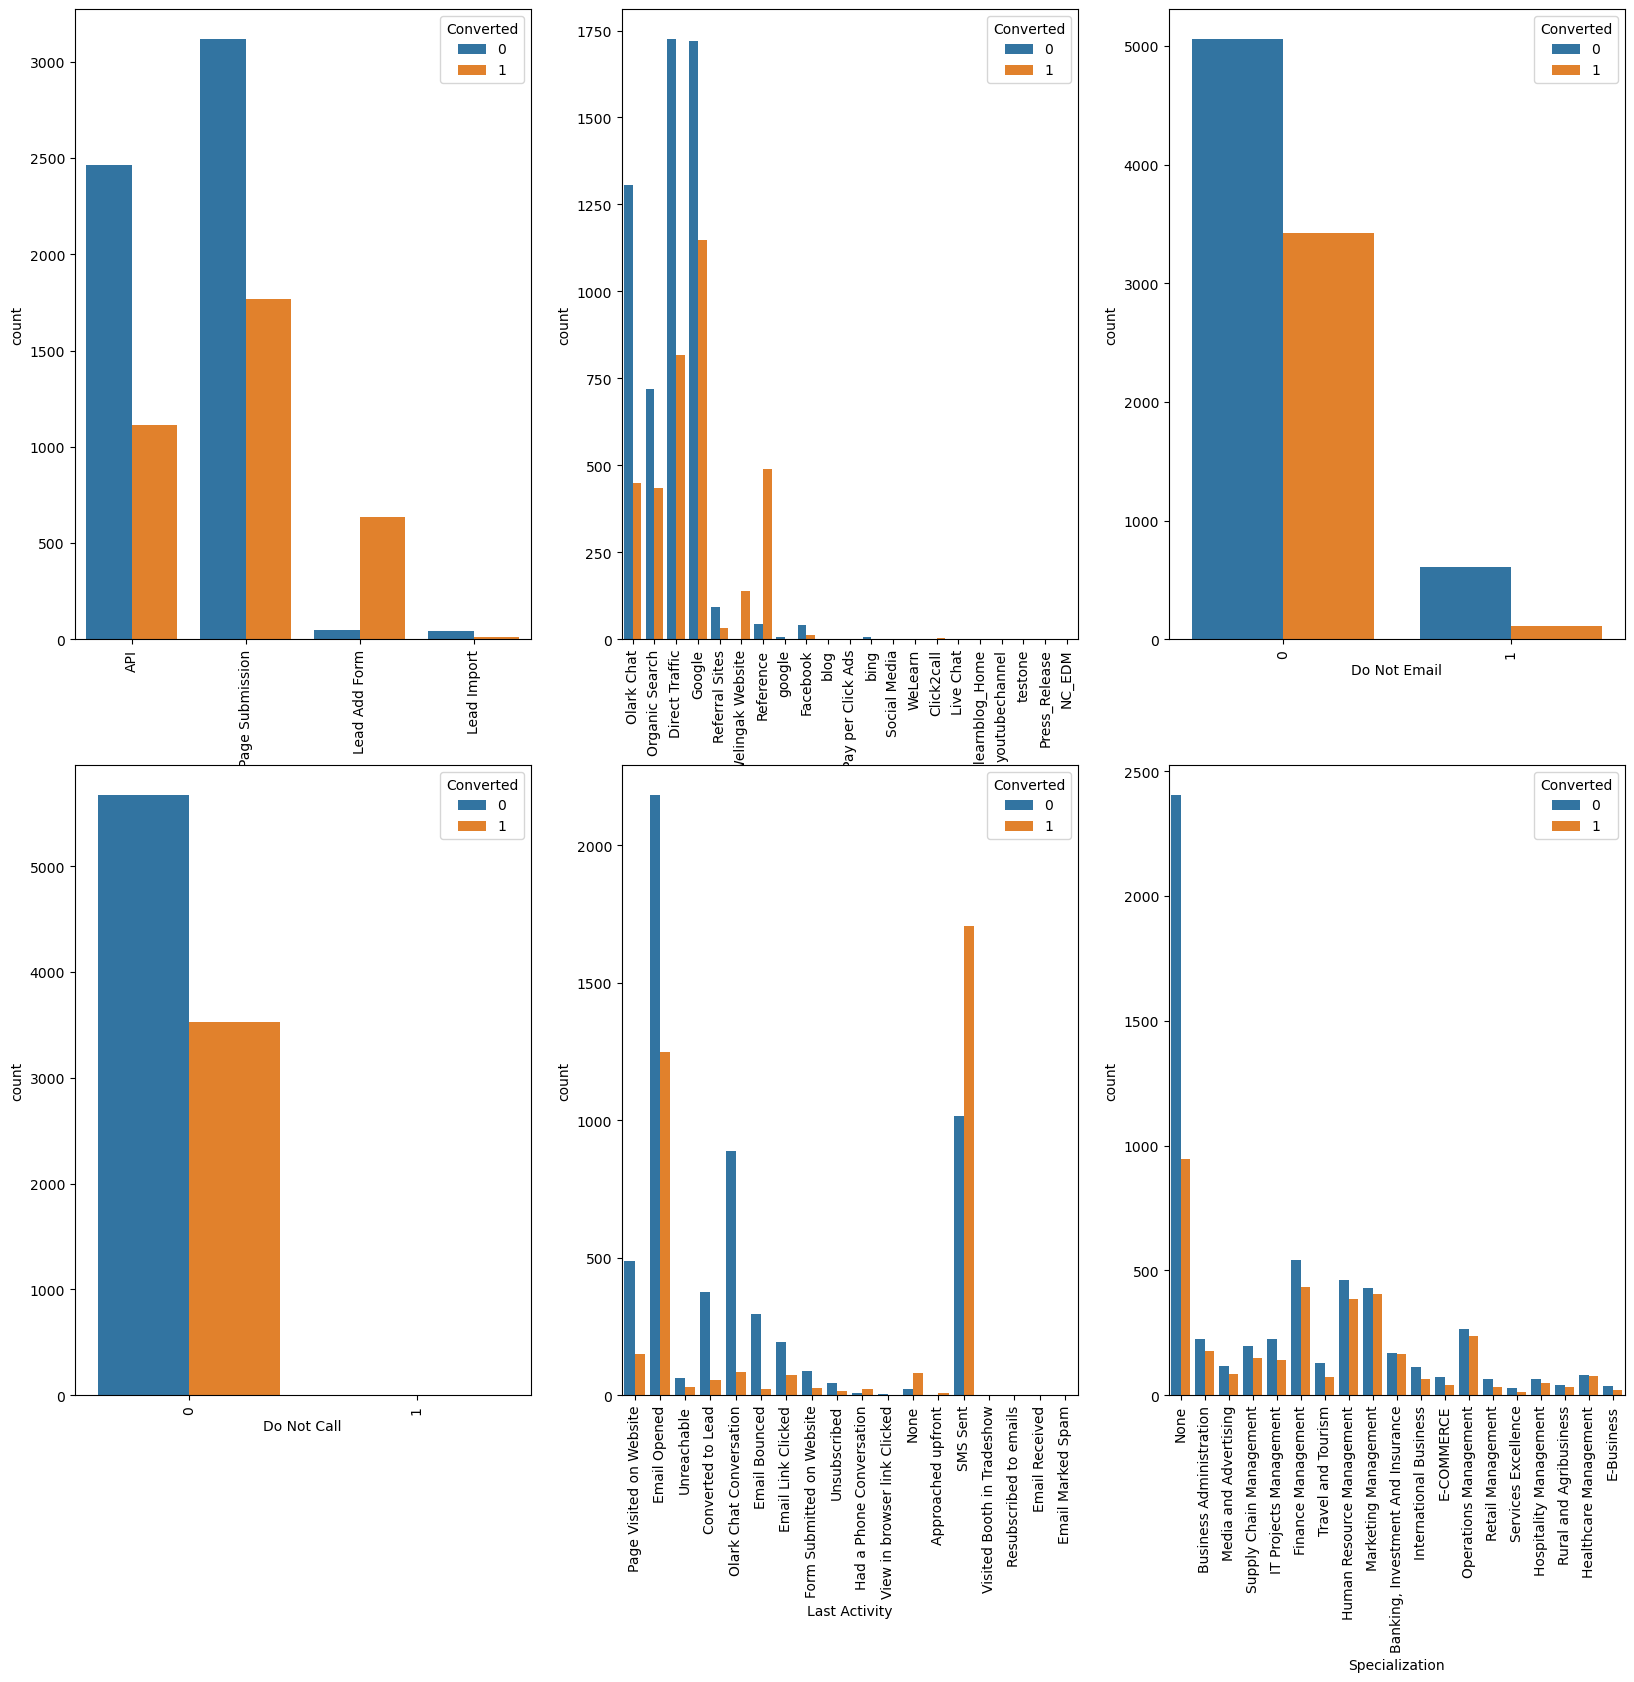

In [53]:
# Plotting the first set of categorical variables vs Converted

plt.figure(figsize=(20, 18))
plt.subplot(2,3,1)
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.subplot(2,3,2)
sns.countplot(x = 'Lead Source', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.subplot(2,3,3)
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.subplot(2,3,4)
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.subplot(2,3,5)
sns.countplot(x = 'Last Activity', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.subplot(2,3,6)
sns.countplot(x = 'Specialization', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.show()

Inferences:
- There is a high rate of conversion from users filling the Lead Add Form, or coming in through references
- Users who check the 'Do not Email' or 'Do not Call' option have lower conversion rates

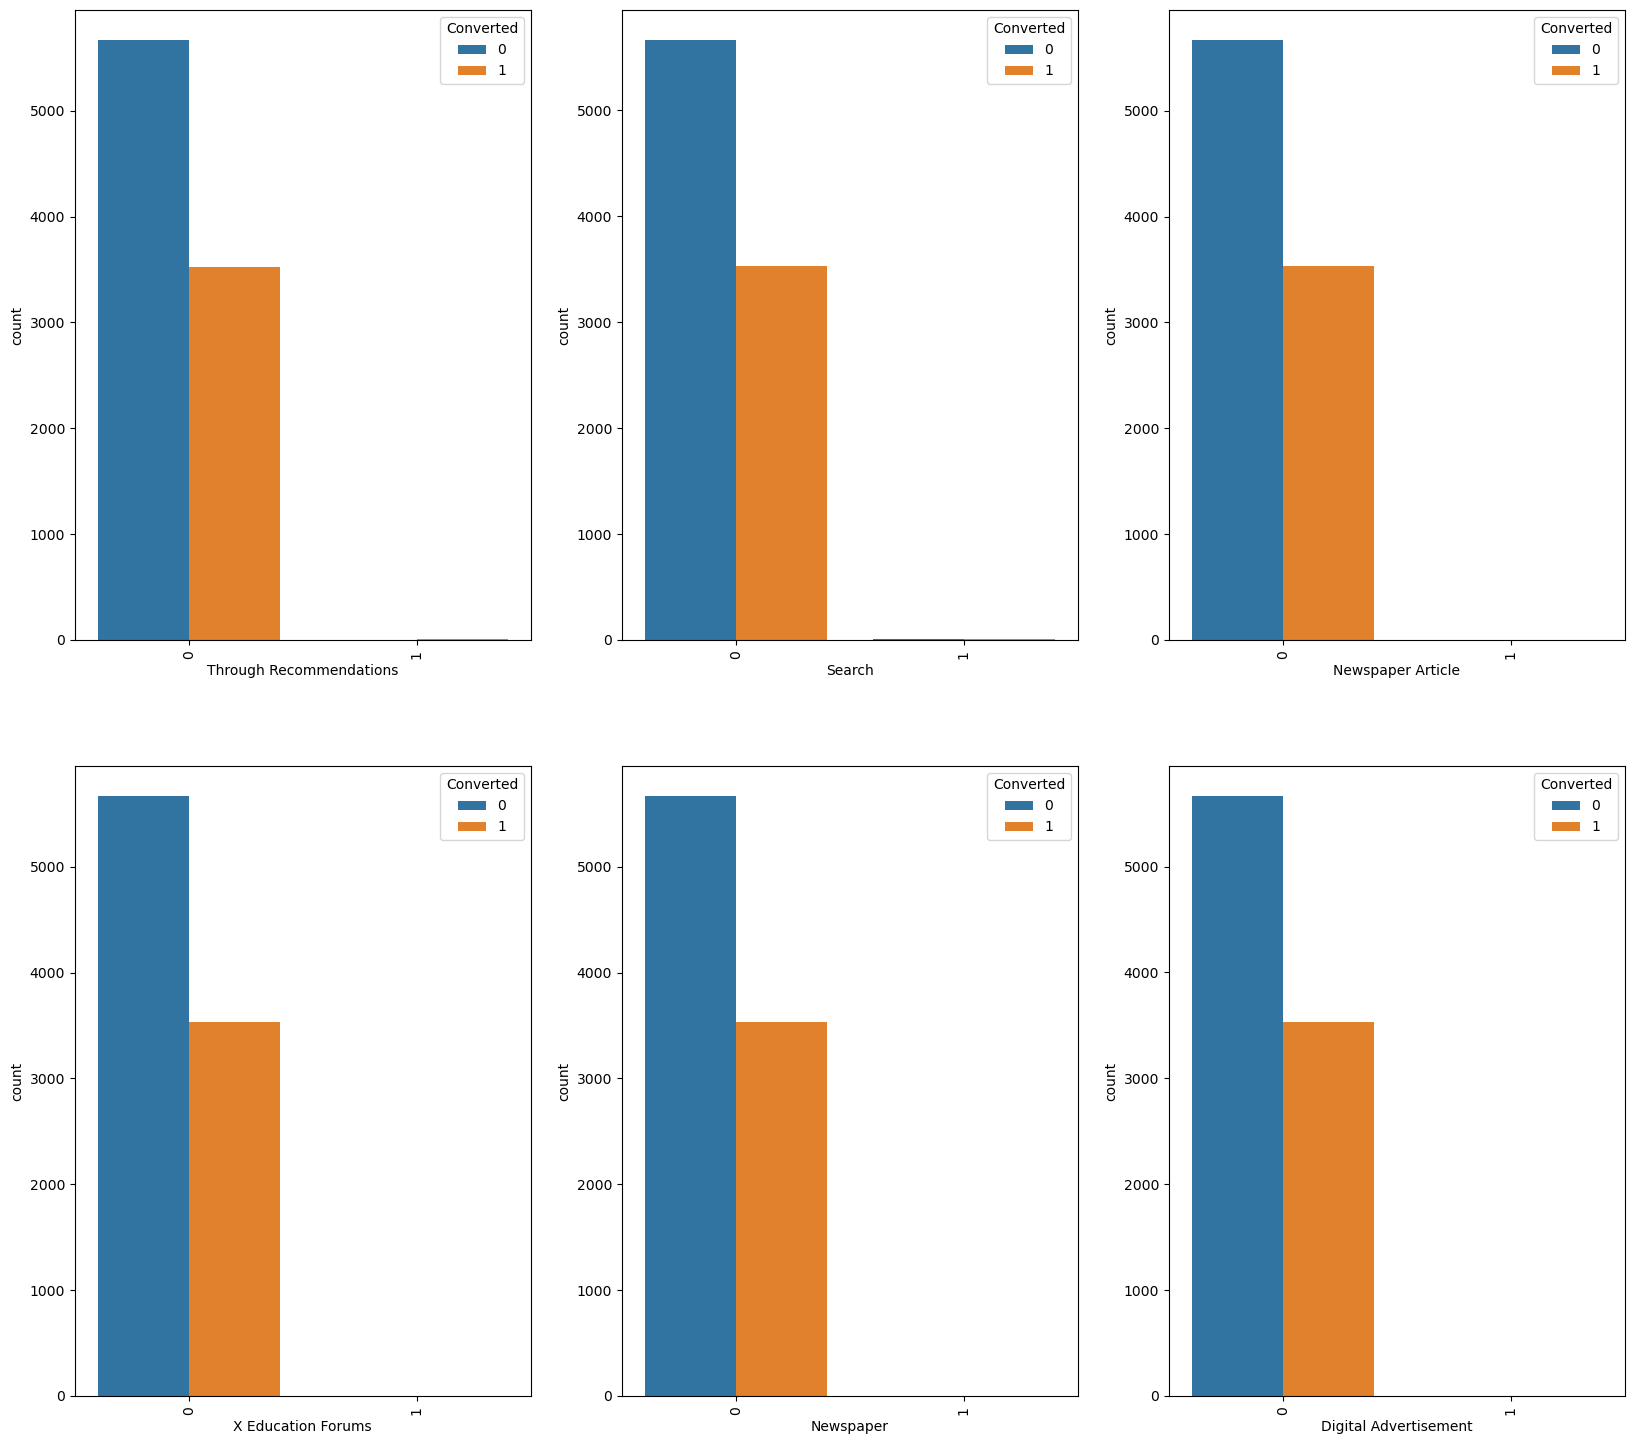

In [54]:
# Plotting the second set of categorical variables vs Converted

plt.figure(figsize=(20, 18))
plt.subplot(2,3,1)
sns.countplot(x = 'Through Recommendations', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.subplot(2,3,2)
sns.countplot(x = 'Search', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.subplot(2,3,3)
sns.countplot(x = 'Newspaper Article', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.subplot(2,3,4)
sns.countplot(x = 'X Education Forums', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.subplot(2,3,5)
sns.countplot(x = 'Newspaper', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.subplot(2,3,6)
sns.countplot(x = 'Digital Advertisement', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.show()

Inferences:
- There are no major differences in conversions from the places where users saw ads

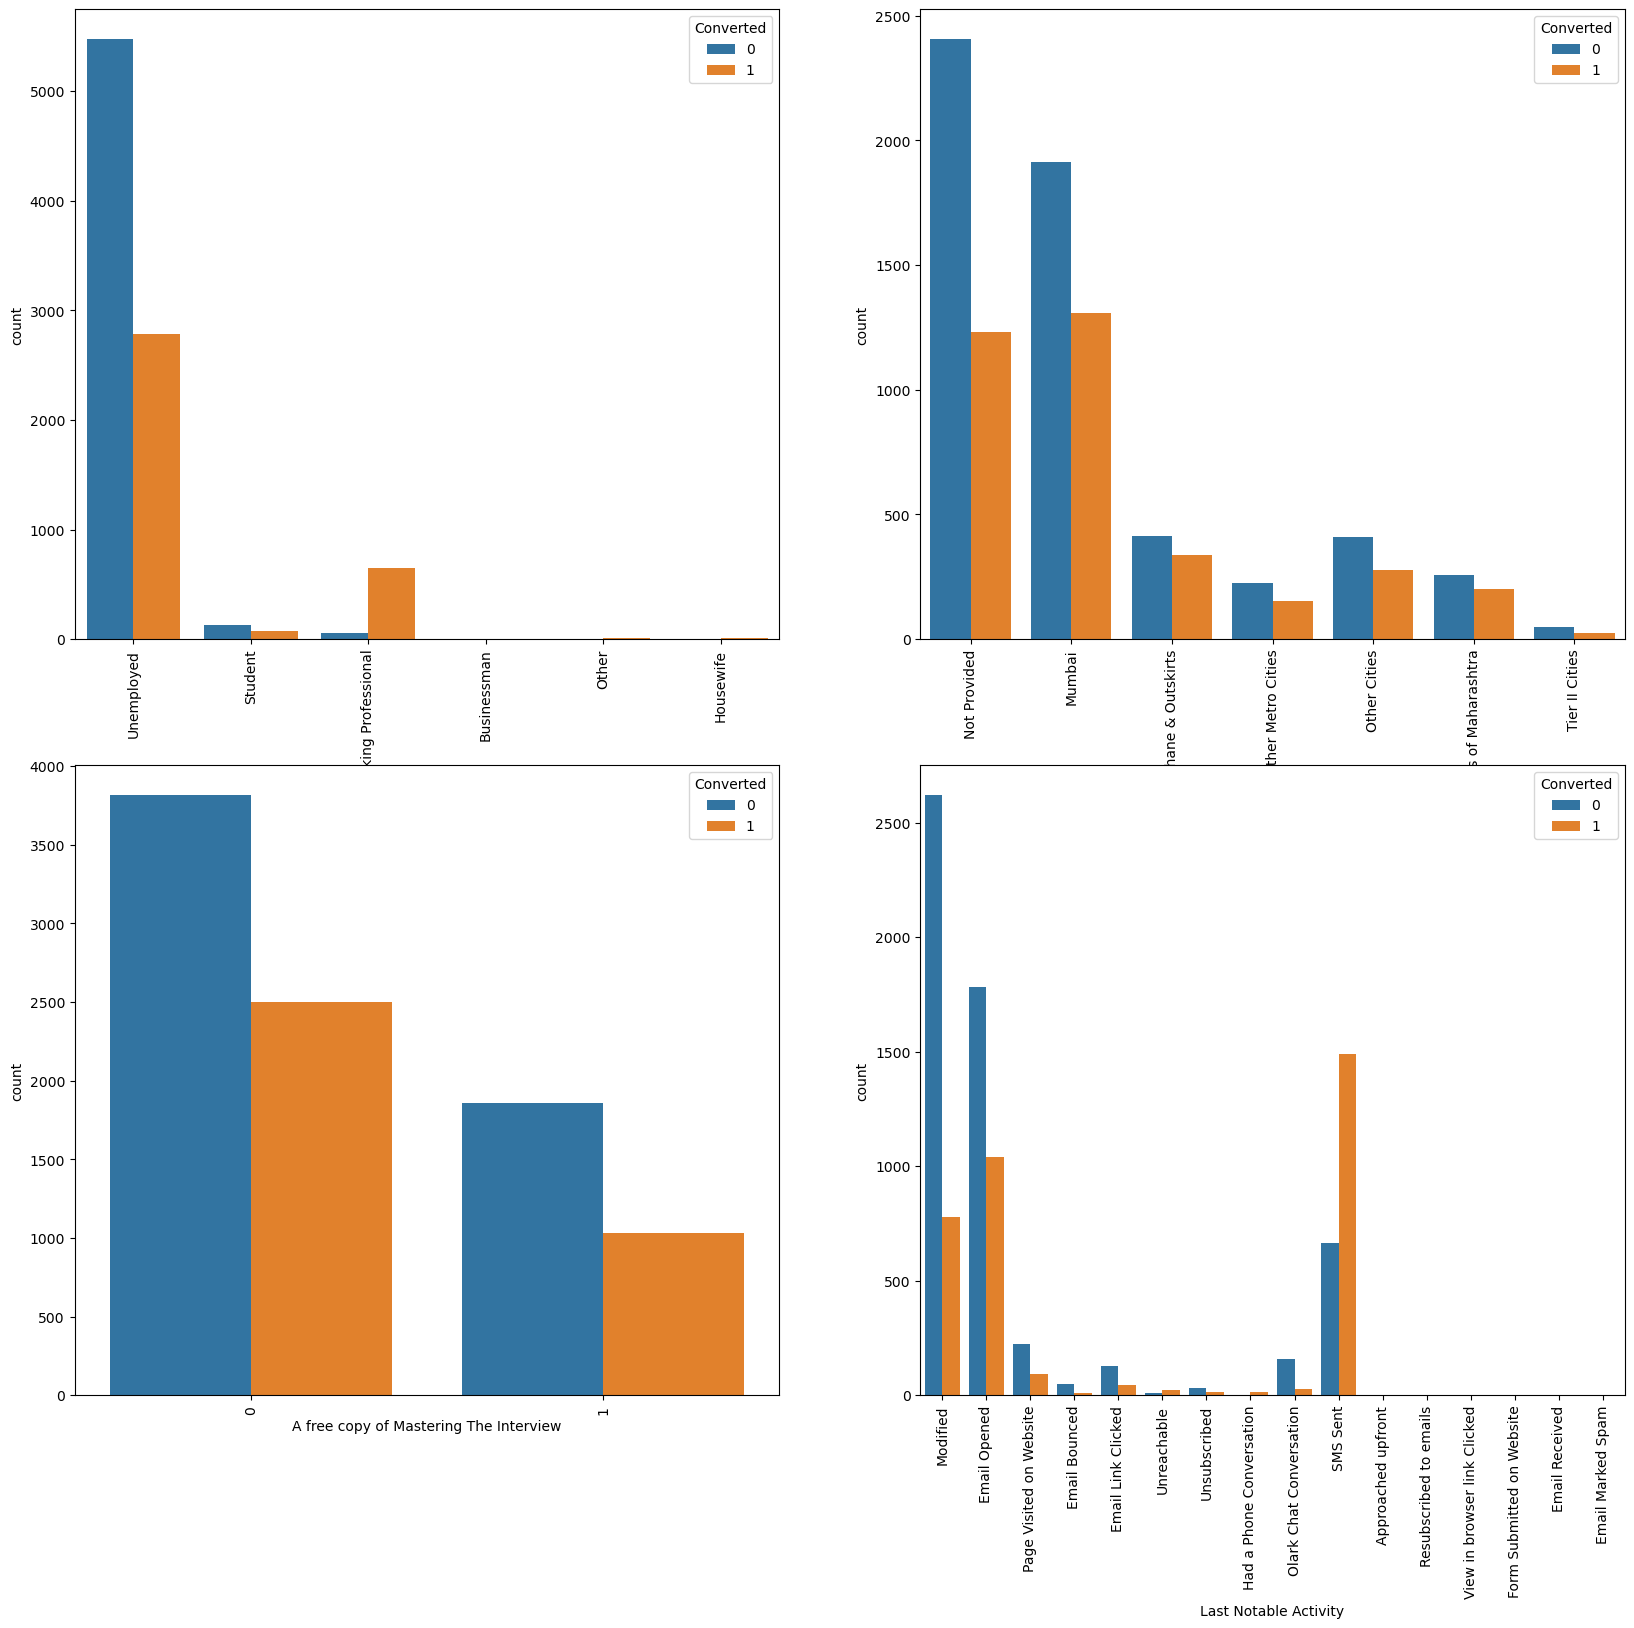

In [61]:
# Plotting the third set of categorical variables vs Converted

plt.figure(figsize=(20, 18))
plt.subplot(2,2,1)
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.subplot(2,2,2)
sns.countplot(x = 'City', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.subplot(2,2,3)
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.subplot(2,2,4)
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = lead_df).tick_params(axis='x', rotation = 90)
plt.show()

Inferences:
- Working professionals have a high conversion rate
- Other categories do not seem to a high correlation with conversion rate

#### ii. Numerical variables vs Converted

In [56]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9204 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9204 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9204 non-null   int64  
 3   Do Not Call                             9204 non-null   int64  
 4   Converted                               9204 non-null   int64  
 5   TotalVisits                             9204 non-null   float64
 6   Total Time Spent on Website             9204 non-null   int64  
 7   Page Views Per Visit                    9204 non-null   float64
 8   Last Activity                           9204 non-null   object 
 9   Specialization                          9204 non-null   object 
 10  What is your current occupation         9204 non-null   object 
 

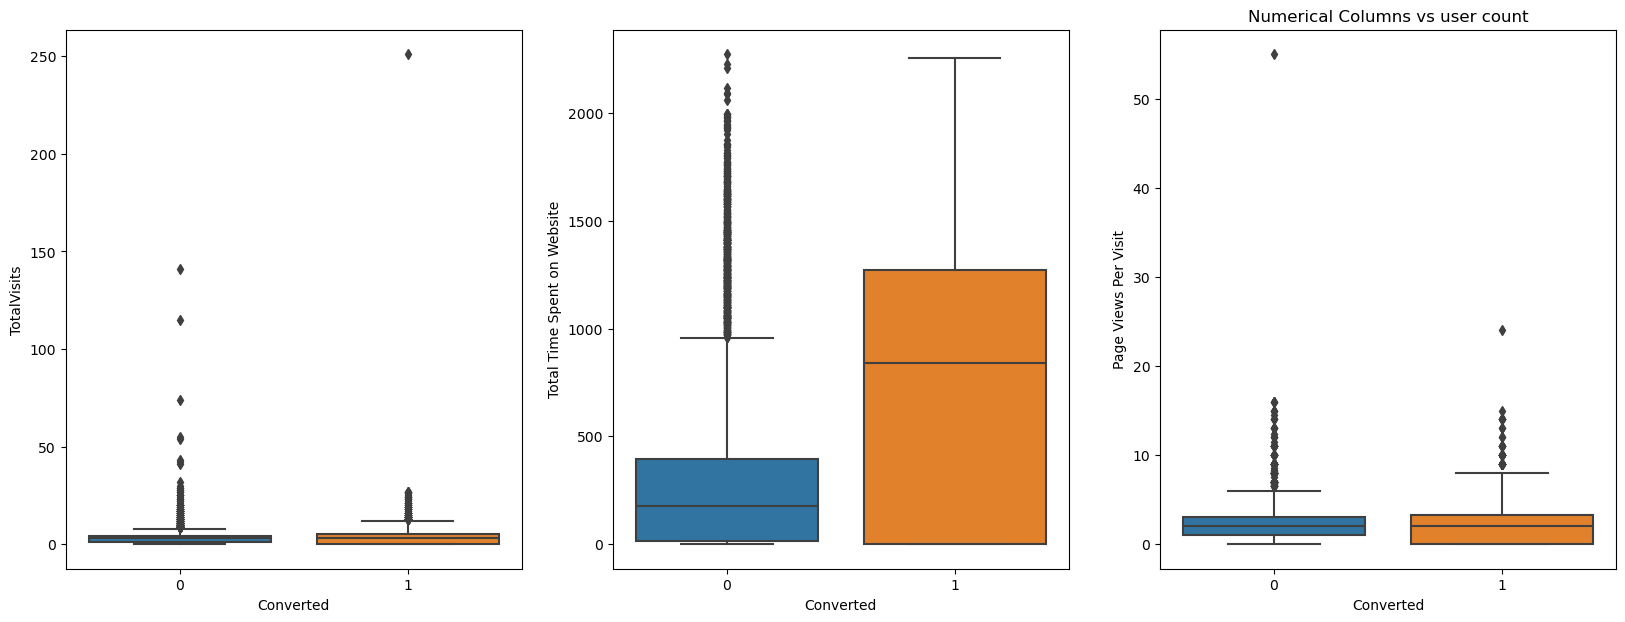

In [65]:
# Plotting the boxplots of numerical columns vs Converted
plt.figure(figsize=(20, 7))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df)
plt.title("Numerical Columns vs user count")
plt.show()

Inferences:
- Users who have spent more time on the company website have a higher rate of conversion
- Total visits and number of pages per visit doesn't seem to have a large affect on rate of conversion

### c. Multivariate Analysis

In [66]:
# Creating the heatmap for all numerical variables
plt.figure(figsize = (20, 10))
sns.heatmap(round(lead_df.corr(),2), annot = True, cmap="YlGnBu")
plt.show()

ValueError: could not convert string to float: 'API'

<Figure size 2000x1000 with 0 Axes>